# Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
      
Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are accurate.
Mention which column is a linear function and which is a polynomial function.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import seaborn as sns

In [51]:
pd.set_option("display.max_rows", None)

df_gold = pd.read_csv('GOLD.csv')
df_gold.head(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [52]:
df_gold.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [54]:
train_pred_df = df_gold[df_gold.Pred.notnull()]
train_pred_df.shape

(411, 9)

In [55]:
pred_df = df_gold[df_gold.Pred.isnull()]
pred_df.shape

(101, 9)

In [56]:
train_pred_df.describe()

,Price,Open,High,Low,Pred,new
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,29934.956204,29931.501217,30051.121655,29817.895377,341.712895,237.811874
std,1004.074382,1003.263473,1012.606075,994.941509,271.075609,201.208916
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29220.500000,29221.500000,29344.500000,29111.000000,156.500000,100.716619
50%,29957.000000,29960.000000,30096.000000,29830.000000,299.000000,173.315183
75%,30705.000000,30700.000000,30837.500000,30580.000000,475.000000,308.057815
max,31895.000000,31877.000000,32075.000000,31725.000000,2210.000000,1121.430991


It is very clear after using describe() method that the 'new' column is a *polynomial* function of the inputs and the 'Pred' column is a *linear model*. It is evident from looking at the standard deviation that **new** has **low variance** as compared to **'Pred'**, as this is possible only if there is a *curve fitted* into the data(in case of polynomial function) whereas, since *Pred* is a linear combination of inputs, there will be a *line* fitted into the data and thus, incurring a higher variance due to outliers.

## Conculsion :-
**Pred** - Linear model 


**new** - Polynomial Function

In [57]:
regressor = LinearRegression()

In [58]:
X_train = train_pred_df[['Price','Open', 'High', 'Low']].values

In [59]:
y_train = train_pred_df.Pred.values

In [60]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Coefficients

In [61]:
regressor.coef_

array([ 2.,  3., -1., -4.])

In [62]:
coef_df = pd.DataFrame(regressor.coef_, ['Price','Open', 'High', 'Low'], columns =['Coefficient'])
coef_df

,Coefficient
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [63]:
regressor.intercept_

2.6432189770275727e-11

In [64]:
pred_nan = regressor.predict(pred_df[['Price','Open', 'High', 'Low']].values)
pred_nan

array([ 852.,  422.,  530.,  144.,  415., 1103.,  411.,  613.,    5.,
        547.,  -27.,  368.,  263.,  615.,  479.,  -82.,  489., 2890.,
        340.,  274.,  469.,  487.,  -48.,  364.,    7.,  277.,  283.,
        550.,  110.,  413.,  146.,  241.,  406.,  119.,  405.,  303.,
        154.,  679., 2111.,  860.,  -37.,  615.,  468.,  716.,  410.,
        251.,  466.,  254.,  109.,  470.,  241.,  776.,  471.,  555.,
       -139.,  224.,  603., 3024.,  331., 2895.,  476.,  589.,  233.,
        670.,  152.,   32.,  960.,  359.,  595.,  439.,  586.,   93.,
        741.,  466.,  502.,  159.,  833.,  378.,    6.,  694.,  518.,
        554.,  517.,  202.,  338.,  489., 1070.,   -8.,  579.,  468.,
        223.,  264., -132.,  350.,  359.,  446.,  535.,  438.,  269.,
        601.,  280.])

In [65]:
df_gold.Pred[411:] = pred_nan

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_gold.tail(5)

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,280.0,429.924911


#### Polynomial Model

In [68]:
regressor_poly = LinearRegression()

In [69]:
y_train_new = train_pred_df.new.values

In [70]:
regressor_poly.fit(X_train, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
regressor_poly.coef_

array([ 1.01202641, -1.00094252,  1.00492221, -1.01604305])

In [72]:
coeff_df_new = pd.DataFrame(regressor_poly.coef_, ['Price','Open', 'High', 'Low'], columns =['New_Coefficient'])
coeff_df_new

,New_Coefficient
Price,1.012026
Open,-1.000943
High,1.004922
Low,-1.016043


In [73]:
present_new_values = pred_df['new'].values

In [74]:
predict_new_values = regressor_poly.predict(pred_df[['Price','Open', 'High', 'Low']].values)

In [75]:
predict_new_values

array([ 195.87175996,   43.81045001,  127.64555171,  126.84850335,
        373.25587121,   96.52669447,  508.14298334,  531.85677824,
        228.27918263,  294.96998744,  276.54889134,  334.86633482,
         96.8648385 ,  338.40650334,  252.48129707, 1402.5726739 ,
        148.72018135,  225.13406706,  410.34039577,  307.46344053,
        689.68423835,   51.96116912,  193.89164564,  312.66604071,
        312.88849686,  321.55222829,  126.09973931,   47.0605739 ,
        186.16758365,  366.17351653,  169.14276939,   76.64757043,
        634.12609327,  341.34757168,  763.03648274,  171.46522044,
        507.58841282,  794.83204407,  328.17978871,  132.32042258,
        226.09963806,  136.84901992,  359.21040512,  143.11366027,
         55.8069992 ,  532.99877952,  345.1036687 ,  562.24132419,
        281.85865627,  621.1101586 ,  115.86474836,   65.58986727,
        291.70207135,   41.98704654,  248.02039852,  199.41784372,
         96.46062112,  724.25808887,  399.20790108,   24.51708

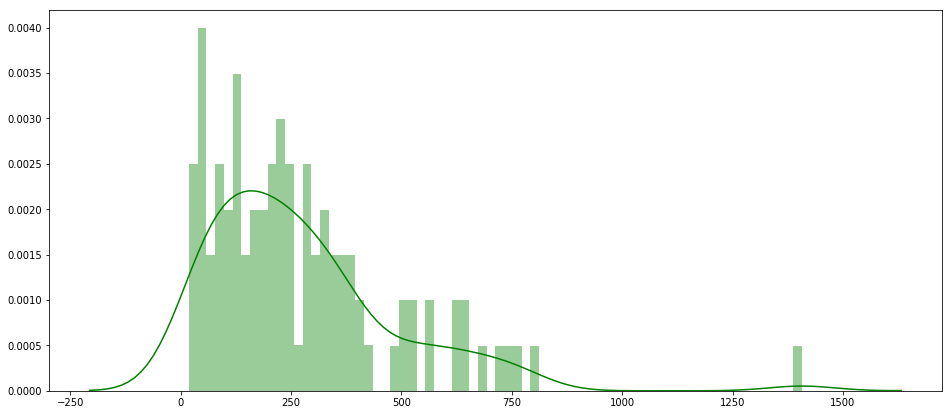

In [76]:
sns.distplot(present_new_values, hist =True, color ='green', bins = 70, label ='Present New')
plt.rcParams['figure.figsize'] = 16,7

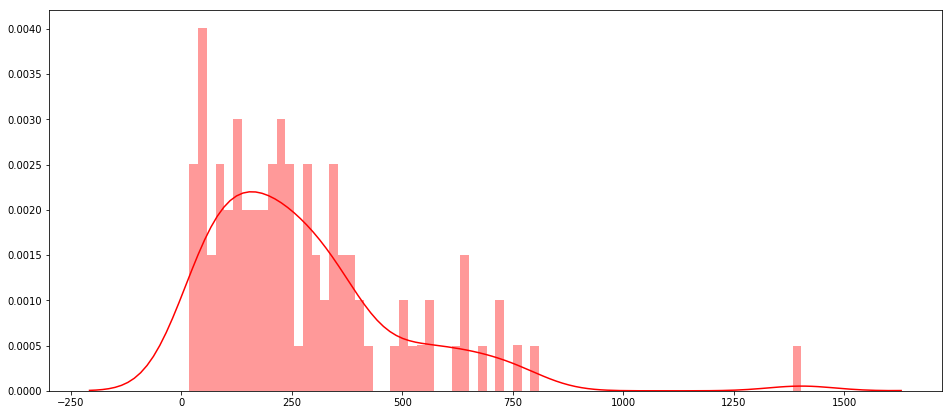

In [77]:
sns.distplot(predict_new_values, hist =True, color ='red', bins = 70,label = 'Predict New')
plt.rcParams['figure.figsize'] = 16,7

In [78]:
df_bar = pd.DataFrame({'Present-New': present_new_values.flatten(), 'Predict-New': predict_new_values.flatten()})
df_bar.head()

,Present-New,Predict-New
0,195.423493,195.871760
1,44.232664,43.810450
2,127.646233,127.645552
3,127.219539,126.848503
4,372.603976,373.255871


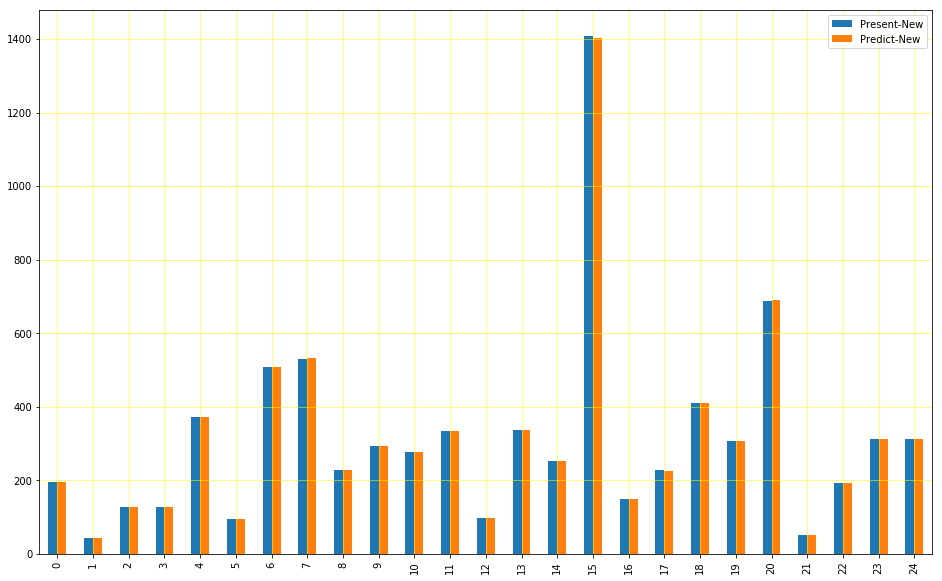

In [79]:
df_bar = df_bar.head(25)
df_bar.plot(kind ='bar', figsize =(16,10))
plt.grid(which ='major', linestyle ='-', linewidth = '0.5', color ='yellow')
plt.show()

#### The Prediction are  accurate

# 3.2 Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -

The daily Beta value for the past 3 months. (Daily= Daily returns)

The monthly Beta value. (Monthly= Monthly returns)

Refrain from using the (covariance(x,y)/variance(x)) formula. Attempt the question using regression.(Regression Reference) Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [85]:
stock_df = pd.read_csv('week3.csv')
stock_df.head(2)

,Date,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,2017-05-15,0,MINDTREE,EQ,510.60,507.35,515.00,505.9,510.5,509.45,...,271952,138800509.8,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change
1,2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.0,511.0,511.30,...,207011,106131728.2,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change


In [86]:
nifty_df = pd.read_csv('Nifty50.csv')
nifty_df.head(2)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89


In [87]:
nifty_df['Date'] = pd.to_datetime(nifty_df.Date)

In [134]:
nifty_df['Day_Perc_Change'] = nifty_df['Close'].pct_change()
nifty_df=nifty_df.fillna(0)
nifty_df.tail(2)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Month_Perc_Change
492,2019-05-10,11314.15,11345.8,11251.05,11278.9,387323416,18085.19,-0.002026,-0.663628
493,2019-05-13,11258.70,11300.2,11125.60,11148.2,357586433,16722.91,-0.011588,-2.917728


In [119]:
X = nifty_df.Day_Perc_Change.values

In [120]:
y = stock_df.Day_Perc_Change.values

In [121]:
beta_cal = LinearRegression()

In [122]:
beta_cal.fit(X.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
beta_cal.intercept_

0.001289951964127185

In [124]:
beta = beta_cal.coef_   
beta

array([0.73232573])

#### Daily beta for last 3 months

In [125]:
X = nifty_df.Day_Perc_Change.values[-90:].reshape(-1,1)

In [126]:
y = stock_df.Day_Perc_Change.values[-90:]

In [127]:
beta_cal.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
beta_cal.intercept_

0.00142959113514859

In [129]:
beta_daily = beta_cal.coef_

In [130]:
beta_daily

array([0.19561888])

[Text(0,0.5,'Daily % change'),
 Text(0.5,0,'Date'),
 Text(0.5,1,'Daily Return Trends')]

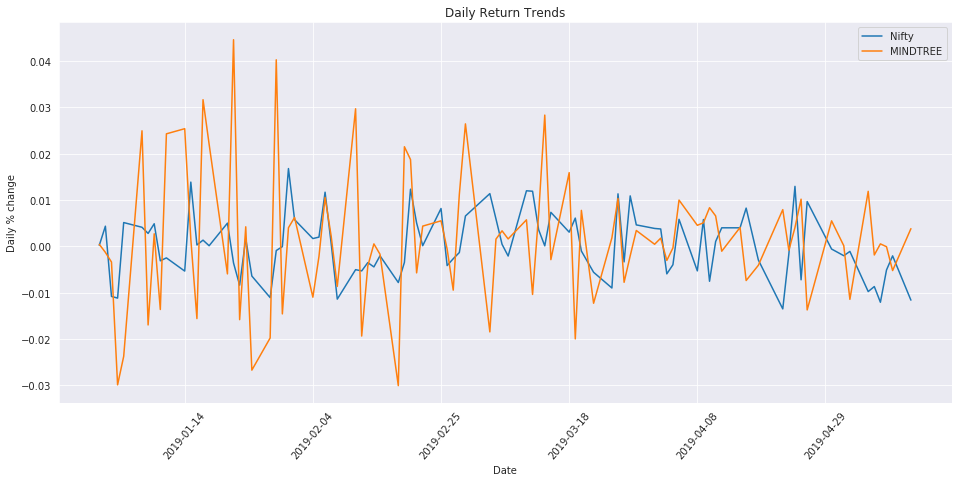

In [131]:
plt.xticks(rotation =50)
sns.set_style('darkgrid')
sns.lineplot(x = nifty_df.Date.values[-90:], y = nifty_df.Day_Perc_Change.values[-90:], label = 'Nifty')
sns.lineplot(x = nifty_df.Date.values[-90:], y = stock_df.Day_Perc_Change.values[-90:], label = 'MINDTREE')
plt.gca().set(xlabel = 'Date', ylabel ="Daily % change", title ='Daily Return Trends')

[Text(0,0.5,'MINDTREE daily returns'),
 Text(0.5,0,'Nifty daily returns'),
 Text(0.5,1,'Correlation between daily stock and market returns')]

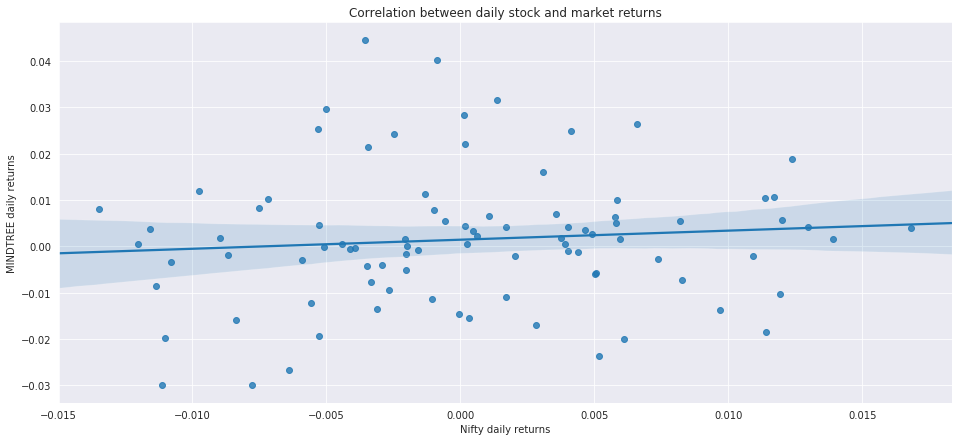

In [133]:
sns.regplot(x = nifty_df.Day_Perc_Change.values[-90:], y = stock_df.Day_Perc_Change.values[-90:])
plt.gca().set(xlabel ='Nifty daily returns', ylabel ='MINDTREE daily returns', title='Correlation between daily stock and market returns')

#### Inference: There is a clear positive correlation between daily stock returns and daily market returns

In [110]:
beta_daily

array([0.00195619])

#### Inference: As the beta value greater than 1 thus, a change in daily market return is likely to result in an even greater change on the daily stock returns. 
Thus, the daily stock return is more volatile than the daily market returns.

#### Monthly beta value

In [135]:
nifty_df['Month_Perc_Change'] = nifty_df.Close.pct_change(periods=30).fillna(0)
nifty_df.head(2)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_Perc_Change,Month_Perc_Change
0,2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000,0.0
1,2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.007078,0.0


In [136]:
stock_df['Month_Perc_Change'] = stock_df['Close Price'].pct_change(periods=30).fillna(0)
stock_df.head(2)

,Date,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend,Month_Perc_Change
0,2017-05-15,0,MINDTREE,EQ,510.60,507.35,515.00,505.9,510.5,509.45,...,138800509.8,8261,100362,36.90,5,2017,509.450000,0.000000,Slight or No change,0.0
1,2017-05-16,1,MINDTREE,EQ,509.45,507.00,515.85,506.0,511.0,511.30,...,106131728.2,5550,82090,39.65,5,2017,510.249582,0.003631,Slight or No change,0.0


In [137]:
X = stock_df.Month_Perc_Change.values.reshape(-1,1)
y = nifty_df.Month_Perc_Change.values

In [138]:
beta_cal.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
beta_cal.intercept_

0.007799061599497288

In [140]:
beta_monthly = beta_cal.coef_
beta_monthly

array([0.10312482])

In [142]:
Dates  = nifty_df.Date.values

[Text(0,0.5,'Monthly % Change'),
 Text(0.5,0,'Dates'),
 Text(0.5,1,'Monthly returns trend')]

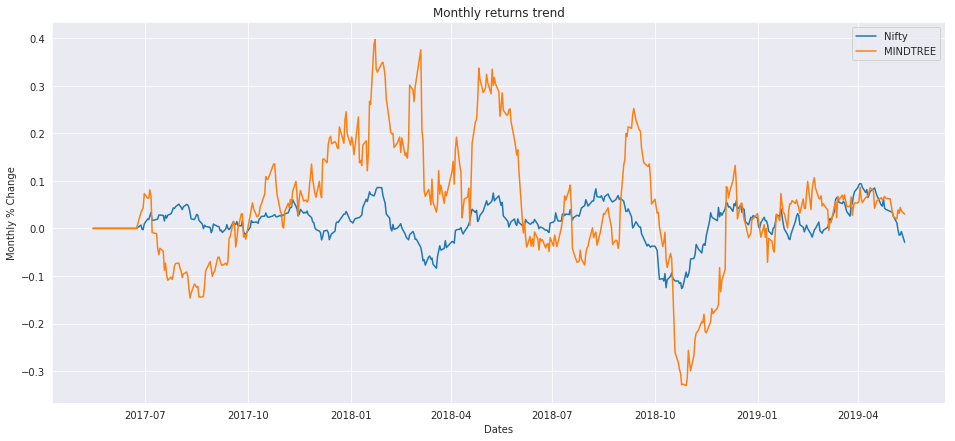

In [144]:
sns.lineplot(x =Dates, y =nifty_df.Month_Perc_Change, label ='Nifty')
sns.lineplot(x =Dates, y = stock_df.Month_Perc_Change, label ='MINDTREE')
plt.gca().set(xlabel ='Dates', ylabel ='Monthly % Change', title ='Monthly returns trend')

[Text(0,0.5,'MINDTREE Monthly Return'),
 Text(0.5,0,'Nifty Monthly Returns'),
 Text(0.5,1,'Correlation between monthly stock and market returns')]

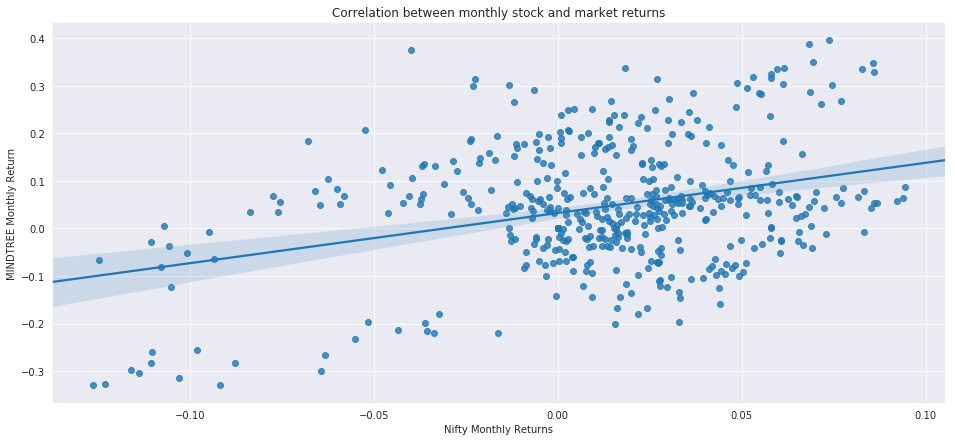

In [146]:
sns.regplot(x = nifty_df.Month_Perc_Change, y = stock_df.Month_Perc_Change)
plt.gca().set(xlabel = 'Nifty Monthly Returns', ylabel ='MINDTREE Monthly Return', title ='Correlation between monthly stock and market returns')

#### Inference: There is seem to be clear correlation between Monthly returns of Nifty and Axis Bank for entire period. The low frequency of outlier suggest that the two variable are quite sensitive towards each other

In [147]:
beta_monthly

array([0.10312482])

This can be seen in the graph that there are decent amount of instances where the monthly stock returns seem to be immune towards the changes in the monthly market returns.

The graph further testifies the beta value obtained from the regression because a beta value close to 0 indicates that the monthly stock returns are very less affected(not so dependent) by the monthly market returns and has a lower volatility.


### if beta -ve:
As a positive beta value suggest that the stock returns are following a similar trend as the market returns i.e. if market returns are providing a profit, so likely is the stock's return and vice-versa.  
However, if the beta value is negative , this implies that  if market returns are profitable, then the individual stock's returns are likely to be in loss and vice-versa. 